Linear Regression using Numpy

Goal : y^=XW+b

A Generating data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
SEED = 1234
NUM_SAMPLES = 50

In [15]:
def sample_generate(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,20, size = num_samples)
    y = 3.5*X + random_noise
    return X,y

In [16]:
X,y = sample_generate(num_samples = NUM_SAMPLES)
data = np.vstack([X,y]).T ## Generate random (linear) data
print(data[:5])

[[ 0.         17.27885036]
 [ 1.          8.39014933]
 [ 2.         14.50880507]
 [ 3.         19.41313578]
 [ 4.         27.74249339]]


In [17]:
#storing in pandas
df = pd.DataFrame(data , columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,17.278850
1,1.0,8.390149
2,2.0,14.508805
3,3.0,19.413136
4,4.0,27.742493


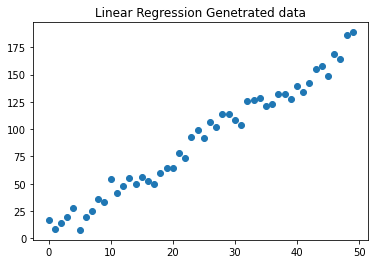

In [18]:
#plotting
plt.title("Linear Regression Genetrated data")
plt.scatter(x = df["X"] , y = df["y"])
plt.show()

Splitting data

In [19]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [20]:
#splitting indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE + VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [21]:
#splitting data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


Standardize Data  z=(inputs - mean)/Standard deviation

In [22]:
#Standardizing data
def standardize_data(data , mean , std):
    return (data - mean)/std

# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

# Determine means and stds
X_train = standardize_data(X_train , X_mean , X_std)
X_test = standardize_data(X_test , X_mean , X_std)
y_train = standardize_data(y_train , y_mean , y_std)
y_test = standardize_data(y_test , y_mean , y_std)
X_val = standardize_data(X_val , X_mean , X_std)
y_val =  standardize_data(y_val , y_mean , y_std)

print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: 2.8, std: 0.2
mean: 2.7, std: 0.4


Weights 
Our goal is to learn a linear model y^
 that models y given X using weights W and bias b

Step 1: Randomly initialize the model's weights W.

In [23]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]

W = 0.01*np.random.randn(INPUT_DIM , OUTPUT_DIM)
b = np.zeros((1,1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


Model

Step 2: Feed inputs X into the model to receive the predictions y^

In [24]:
y_pred = np.dot(X_train , W) + b
print(f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


Loss  J(theta) = MSE = 1/N*sum from (i-1) to N in (yi - y^i)^2

Step 3: Compare the predictions y^ with the actual target values y using the objective (cost) function to determine the loss J. A common objective function for linear regression is mean squared error (MSE). This function calculates the difference between the predicted and target values and squares it.

In [25]:
#loss
N = len(y_train)
loss = 1/N*np.sum((y_train - y_pred)**2)
print (f"loss: {loss:.2f}")

loss: 1.01


Gradients

Step 4: Calculate the gradient of loss J(theta) w.r.t to the model weights.

In [26]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

Update weights

Step 5: Update the weights W using a small learning rate alpha.

In [27]:
LEARNING_RATE = 1e-1
# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

Training

Step 6: Repeat steps 2 - 5 to minimize the loss and train the model.

In [28]:
NUM_EPOCHS = 100
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] · [1X1] = [NX1]
    y_pred = np.dot(X_train, W) + b

    # Loss
    loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

    # Show progress
    if epoch_num%10 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # Backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.988
Epoch: 10, loss: 0.054
Epoch: 20, loss: 0.043
Epoch: 30, loss: 0.043
Epoch: 40, loss: 0.043
Epoch: 50, loss: 0.043
Epoch: 60, loss: 0.043
Epoch: 70, loss: 0.043
Epoch: 80, loss: 0.043
Epoch: 90, loss: 0.043


Evaluation

train_MSE: 0.04, test_MSE: 0.06


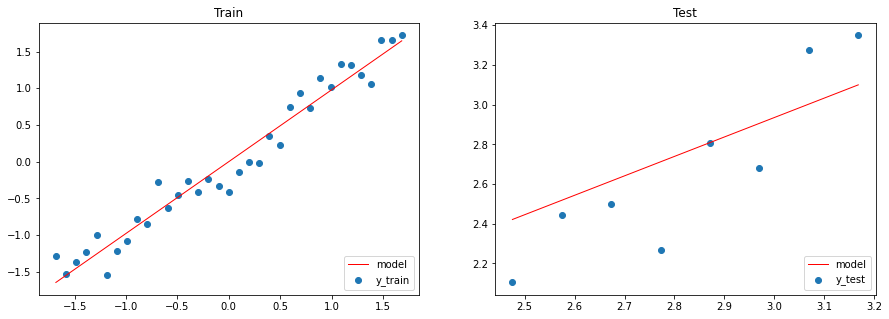

In [29]:
# Predictions
pred_train = W*X_train + b
pred_test = W*X_test + b
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

Interpretability

In [30]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.6X + 4.0
